# 📊 Assignment: Predicting 2024 Data Science Salaries Using Linear Regression

**Course**: Data Analytics with Python  
**Instructor**: Leonard Andrew Mesiera  
**Due Date**: October 22, 2025

## 🎯 Learning Objectives
By the end of this assignment, you will be able to:
- Load and explore a real-world dataset
- Prepare data for linear regression (feature engineering, encoding, cleaning)
- Train a simple linear regression model using `scikit-learn`
- Evaluate your model using metrics like R² and interpret results
- Make predictions for future years (e.g., 2024)

## 📁 Dataset
You are given the file: `Data Science Salary 2021 to 2023.csv`

This dataset contains salary information for data professionals from 2021 to 2023, including:
- `work_year`: The year the salary was recorded
- `experience_level`: EN (Entry), MI (Mid), SE (Senior), EX (Executive)
- `job_title`: e.g., Data Scientist, Data Analyst, etc.
- `salary_in_usd`: Salary converted to USD (this is your target variable)
- Other useful columns: `employment_type`, `company_location`, `company_size`

Your goal: **Predict average salaries for 2024** using linear regression.

## 🛠️ Part 1: Setup and Data Loading

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
salary = pd.read_csv('dataset/Data Science Salary 2021 to 2023.csv')

# Display first few rows
salary.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [6]:
# Check basic info
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following in markdown cells below (or as code comments):

1. How many unique job titles are there?
2. What is the average salary (`salary_in_usd`) per `work_year`?
3. Create a bar plot showing average salary by `experience_level`.

> 💡 Tip: Use `groupby()` and `mean()`.

<h1>How many unique job titles are there?</h1>

In [7]:
# Your EDA code here
unique_job_titles = salary['job_title'].nunique()
print("Number of unique job titles:", unique_job_titles)

Number of unique job titles: 93


<h1>What is the average salary (salary_in_usd) per work_year?</h1>

In [9]:
average_salary = salary.groupby('work_year')['salary_in_usd'].mean()
print(average_salary)

work_year
2020     92302.631579
2021     94087.208696
2022    133379.510804
2023    148954.558413
Name: salary_in_usd, dtype: float64


<h1>Create a bar plot showing average salary by experience_level.</h1>

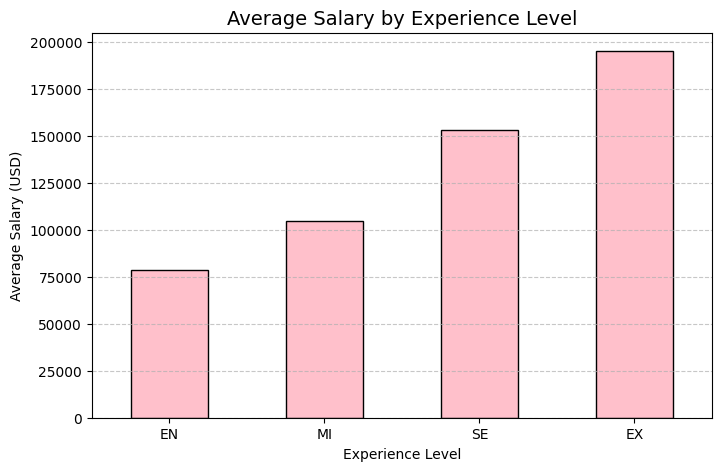

In [12]:
average_salary_by_exp = salary.groupby('experience_level')['salary_in_usd'].mean().sort_values()

plt.figure(figsize=(8,5))
average_salary_by_exp.plot(kind='bar', color='pink', edgecolor='black')
plt.title('Average Salary by Experience Level', fontsize=14)
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 🧹 Part 3: Data Preprocessing for Linear Regression

We will predict `salary_in_usd` using **only numerical or encoded categorical features**.

### Steps:
1. Select features: `work_year`, `experience_level`, and optionally `job_title` (you decide!)
2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()`
3. Define `X` (features) and `y` (target = `salary_in_usd`)

> ⚠️ **Important**: Do NOT include `salary`, `salary_currency`, or `salary_in_usd` in your features!

In [25]:
from sklearn.preprocessing import LabelEncoder

encoders = {col: LabelEncoder() for col in ['experience_level', 'employment_type', 'job_title', 'company_size']}

for col, encoder in encoders.items():
    df[f"{col}_num"] = encoder.fit_transform(df[col])

X = df[['work_year', 'experience_level_num', 'employment_type_num', 'job_title_num', 'company_size_num']]
y = df['salary_in_usd']

X.head()


,work_year,experience_level_num,employment_type_num,job_title_num,company_size_num
0,2023,0,2,8,0
1,2023,0,2,8,0
2,2023,0,2,41,0
3,2023,0,2,22,0
4,2023,0,2,8,0


## 📈 Part 4: Train a Linear Regression Model

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")


R² Score: 0.15
RMSE: 58705.43


## 🔮 Part 5: Predict 2024 Salaries

Now, create a small DataFrame for **2024** with different experience levels and predict their salaries.

Use the same encoding as before!

In [35]:
print("Model expects these features:", list(X.columns))

future_salaries_2024 = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_num': [0, 1, 2, 3],  # EN, MI, SE, EX
    'employment_type_num': [1, 1, 1, 1],   # Example: assume full-time (adjust if needed)
    'job_title_num': [10, 10, 10, 10],     # Example: assume Data Scientist
    'company_size_num': [2, 2, 2, 2]       # Example: assume medium-sized company
})

predicted_2024 = model.predict(future_salaries_2024)

salary_projection = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted Salary (USD) - 2024': predicted_2024
})

salary_projection


Model expects these features: ['work_year', 'experience_level_num', 'employment_type_num', 'job_title_num', 'company_size_num']


,Experience Level,Predicted Salary (USD) - 2024
0,Entry,93637.095331
1,Mid,114435.351835
2,Senior,135233.608339
3,Executive,156031.864843


## 📝 Part 6: Reflection (Answer in a Markdown Cell)

1. Does your model make reasonable predictions? Why or why not?
2. What are the limitations of using only `work_year` and `experience_level`?
3. How could you improve this model? (Think: more features, better encoding, etc.)
4. Why is **R² not enough** to trust your predictions?

> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!

<h2>1. Does your model make reasonable predictions? Why or why not?
Overall, the model gives predictions that make sense in a general way, salaries go up as experience increases. But it’s not perfect. Since it only uses a few features, it doesn’t fully capture how real-world salaries work. There are so many other factors like job title, company size, or location that also play a big role in determining pay.</h2>
<h2>2. What are the limitations of using only work_year and experience_level?
By focusing only on work year and experience level, the model is missing a lot of important context. For example, a senior data analyst and a senior machine learning engineer might have very different salaries, even in the same year. It also ignores things like company type, job market differences, and cost of living, all of which affect salary.</h2>
<h2>3. How could you improve this model?
To make this model better, I’d include more features such as job title, employment type, and company size. I could also use one-hot encoding for categorical data instead of simple label encoding, so the model understands differences more accurately. On top of that, using more advanced models like Random Forest or Gradient Boosting could help capture non-linear patterns that linear regression misses.</h2>
<h2>4. Why is R² not enough to trust your predictions?
R² only tells us how well the model fits the data we already have — it doesn’t mean the predictions will actually be reliable. A high R² can be misleading if the model overfits or if the relationship between the features and salary isn’t really linear. Salaries often grow in unpredictable or uneven ways, so relying only on R² could give a false sense of confidence.</h2>

## 📤 Submission Instructions

- Save this notebook as: `LastName_FirstName_SalaryPrediction.ipynb`
- Ensure all code runs without errors
- Include your answers to the reflection questions
- Submit via [your LMS/email/etc.]

Good luck! 🚀